
===== Classification Report =====
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     34595
           1       0.65      0.93      0.77      5495

    accuracy                           0.92     40090
   macro avg       0.82      0.93      0.86     40090
weighted avg       0.94      0.92      0.93     40090

Accuracy: 0.9232726365677226


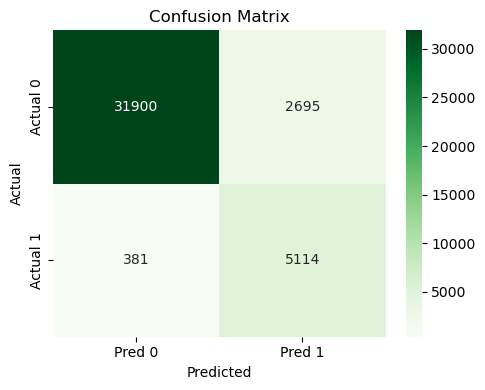


ROC AUC Score: 0.9783


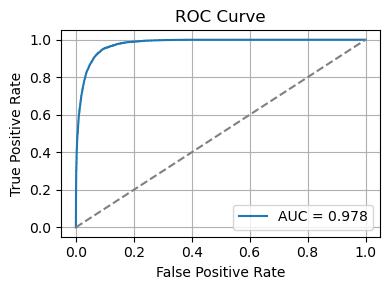

Precision-Recall AUC: 0.8834


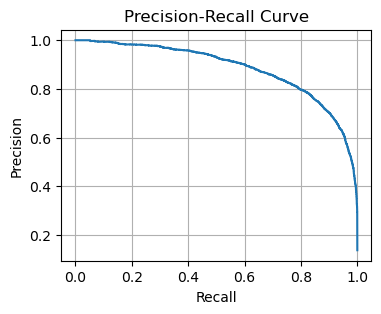

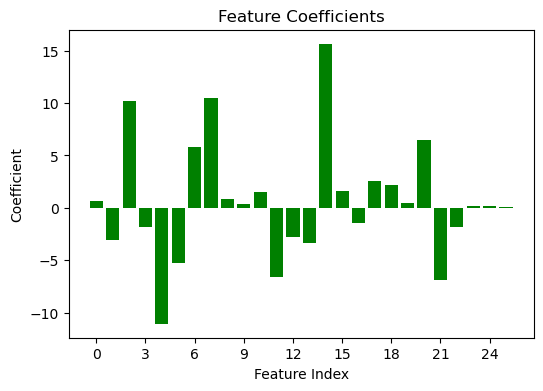

In [5]:

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve
)

# =============================
# Load Dataset
# =============================
dataset_path = r"C:\Users\kotha\OneDrive\Desktop\CombinedData\combined_turbo_fan_data_with_RUL_and_Failure.csv"
df = pd.read_csv(dataset_path)

# =============================
# Clean Up Columns
# =============================
df = df.drop(columns=["RUL", "unit_number"], errors="ignore")

# =============================
# Split Features / Target
# =============================
X = df.drop(columns=["Failure"])
y = df["Failure"]

# Encode any categorical columns
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Scale features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

# =============================
# Logistic Regression Model
# =============================
log_reg = LogisticRegression(
    max_iter=500,
    C=0.1,
    class_weight="balanced"
)
log_reg.fit(X_train, y_train)

# Predictions (slightly tuned threshold)
y_prob = log_reg.predict_proba(X_test)[:, 1]
threshold = 0.55
y_pred = (y_prob > threshold).astype(int)

print("\n===== Classification Report =====")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# =============================
# Confusion Matrix (Green)
# =============================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Greens",
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# =============================
# ROC Curve (Smaller Size)
# =============================
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("\nROC AUC Score:", round(roc_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="grey")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
# =============================
# Precision–Recall Curve (Fixed)
# =============================
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(y_test, y_prob)

pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", round(pr_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

# =============================
# Simple Feature Coefficient Plot
# =============================
coef = log_reg.coef_[0]

plt.figure(figsize=(6, 4))
plt.bar(range(len(coef)), coef, color="green")
plt.title("Feature Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient")
plt.xticks(range(0, len(coef), 3))  # cleaner x-axis
plt.show()



===== Decision Tree – Classification Report =====
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     27676
           1       0.87      0.76      0.81      4396

    accuracy                           0.95     32072
   macro avg       0.92      0.87      0.89     32072
weighted avg       0.95      0.95      0.95     32072

Accuracy: 0.9514841606385632


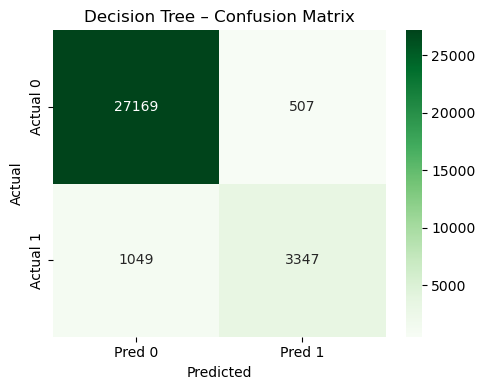

ROC AUC Score: 0.9662


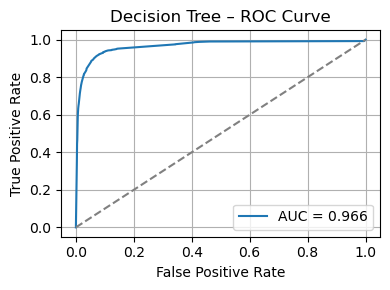

Precision-Recall AUC: 0.8771


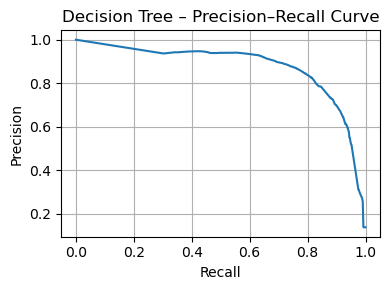

In [9]:
# =============================
# Import Libraries
# =============================
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# Train Decision Tree Model
# =============================
dt_model = DecisionTreeClassifier(
    max_depth=10,          # controls overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

# =============================
# Predictions
# =============================
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
threshold = 0.55
y_pred_dt = (y_prob_dt > threshold).astype(int)

# =============================
# Classification Report
# =============================
print("\n===== Decision Tree – Classification Report =====")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# =============================
# Confusion Matrix (Green)
# =============================
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Greens",
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.title("Decision Tree – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# =============================
# ROC Curve
# =============================
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", round(roc_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="grey")
plt.title("Decision Tree – ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# Precision–Recall Curve
# =============================
precision, recall, _ = precision_recall_curve(y_test, y_prob_dt)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", round(pr_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(recall, precision)
plt.title("Decision Tree – Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()



===== Random Forest – Classification Report =====
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     27676
           1       0.80      0.91      0.85      4396

    accuracy                           0.96     32072
   macro avg       0.89      0.94      0.91     32072
weighted avg       0.96      0.96      0.96     32072

Accuracy: 0.9563170366674981


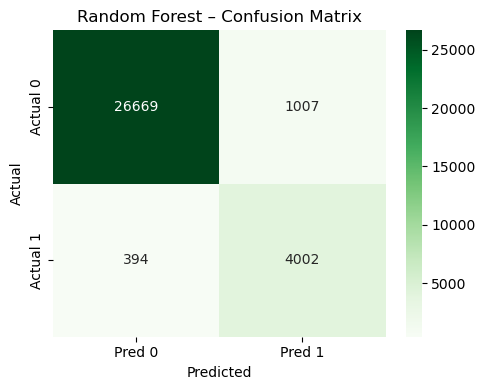

ROC AUC Score: 0.9897


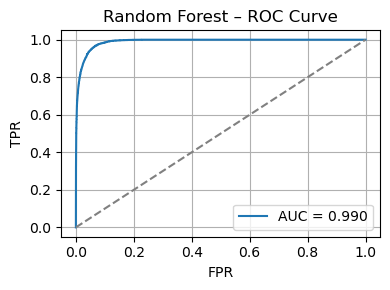

Precision-Recall AUC: 0.9425


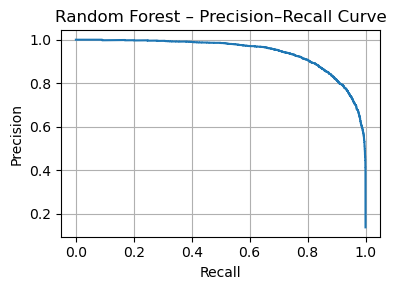

C:\Users\kotha\AppData\Local\Temp\ipykernel_11384\916990909.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")


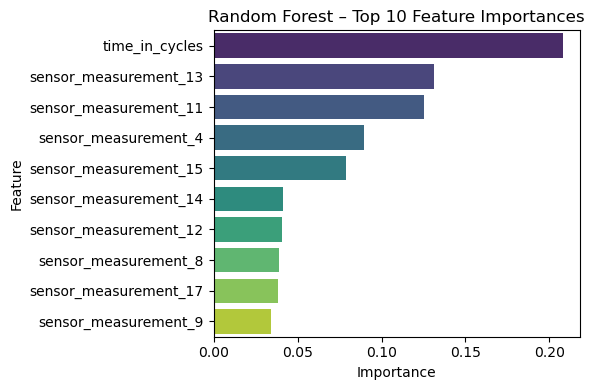

In [13]:
# Random Forest
# Import Library
# =============================
from sklearn.ensemble import RandomForestClassifier

# =============================
# Train Random Forest
# =============================
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# =============================
# Predictions
# =============================
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.55
y_pred_rf = (y_prob_rf > threshold).astype(int)

# =============================
# Classification Report
# =============================
print("\n===== Random Forest – Classification Report =====")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# =============================
# Confusion Matrix (Green)
# =============================
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Greens",
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.title("Random Forest – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# =============================
# ROC Curve
# =============================
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", round(roc_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="grey")
plt.title("Random Forest – ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# Precision–Recall Curve
# =============================
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", round(pr_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(recall, precision)
plt.title("Random Forest – Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()
# =============================
# Random Forest Feature Importance
# =============================
importances = rf_model.feature_importances_
features = X.columns

# Create a sorted dataframe
feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10 features
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")
plt.title("Random Forest – Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



In [17]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
    --------------------------------------- 1.3/72.0 MB 13.4 MB/s eta 0:00:06
   - -------------------------------------- 2.6/72.0 MB 7.6 MB/s eta 0:00:10
   -- ------------------------------------- 4.2/72.0 MB 7.4 MB/s eta 0:00:10
   --- ------------------------------------ 5.5/72.0 MB 6.8 MB/s eta 0:00:10
   --- ------------------------------------ 6.8/72.0 MB 6.6 MB/s eta 0:00:10
   ---- ----------------------------------- 8.1/72.0 MB 6.6 MB/s eta 0:00:10
   ----- ---------------------------------- 9.7/72.0 MB 6.6 MB/s eta 0:00:10
   ----- ---------------------------------- 10.7/72.0 MB 6.5 MB/s eta 0:00:10
   ------ --------------------------------- 12.1/72.0 MB 6.4 MB/s eta 0:00:10
   ------- -------------------------------- 13.4/72.0 MB 6.3 MB/s eta 0:00:10
   -------- ------------------------------- 14.7/72.0 MB 6.3 MB/s eta 0:00:10
   -------- ------------------------------- 15.7/72.0 MB 6.3 MB/s eta 0:00:09


C:\Users\kotha\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:46:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



===== XGBoost – Classification Report =====
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     27676
           1       0.77      0.95      0.85      4396

    accuracy                           0.95     32072
   macro avg       0.88      0.95      0.91     32072
weighted avg       0.96      0.95      0.96     32072

Accuracy: 0.9538538288850087


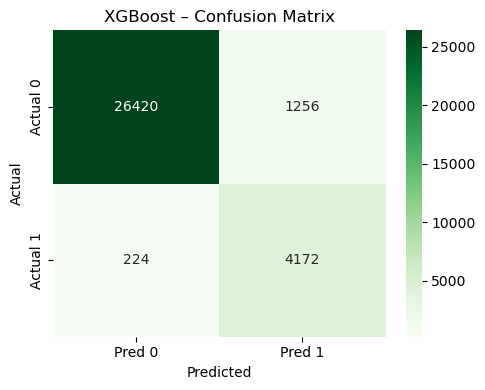

ROC AUC Score: 0.9914


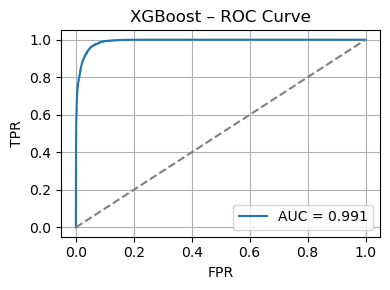

Precision-Recall AUC: 0.9517


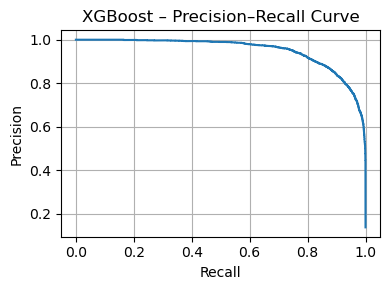

C:\Users\kotha\AppData\Local\Temp\ipykernel_11384\918947564.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")


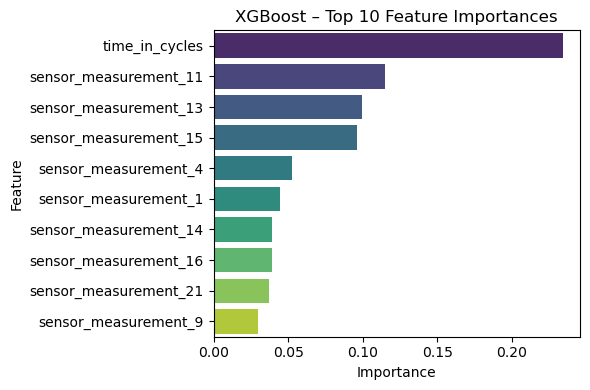

In [19]:
# =============================
# Import Libraries
# =============================
import xgboost as xgb
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_curve,
    auc,
    precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# =============================
# Train XGBoost Classifier
# =============================
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # balance classes
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(X_train, y_train)

# =============================
# Predictions
# =============================
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.55
y_pred_xgb = (y_prob_xgb > threshold).astype(int)

# =============================
# Classification Report
# =============================
print("\n===== XGBoost – Classification Report =====")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

# =============================
# Confusion Matrix (Green)
# =============================
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Greens",
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.title("XGBoost – Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# =============================
# ROC Curve
# =============================
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
print("ROC AUC Score:", round(roc_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="grey")
plt.title("XGBoost – ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# Precision–Recall Curve
# =============================
precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", round(pr_auc, 4))

plt.figure(figsize=(4, 3))
plt.plot(recall, precision)
plt.title("XGBoost – Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================
# XGBoost Feature Importance
# =============================
importances = xgb_model.feature_importances_
features = X.columns

# Create a sorted dataframe
feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 10 features
plt.figure(figsize=(6, 4))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(10), palette="viridis")
plt.title("XGBoost – Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
